<a href="https://colab.research.google.com/github/anishpawarrr/acumen/blob/main/stockpred1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Importing dataset

In [32]:
dataset = pd.read_csv('stockdata.csv')
table = dataset.iloc[:,:]
print(table)
print()
print("Number of records -> ",len(table))
print()
rsilist = dataset.iloc[-50:,4].values
rsilist = np.array(rsilist)
print(rsilist)

             Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100178   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094952   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087983   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090160   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092774   
...           ...         ...         ...         ...         ...         ...   
10463  2022-06-13  132.869995  135.199997  131.440002  131.880005  131.880005   
10464  2022-06-14  133.130005  133.889999  131.479996  132.759995  132.759995   
10465  2022-06-15  134.289993  137.339996  132.160004  135.429993  135.429993   
10466  2022-06-16  132.080002  132.389999  129.039993  130.059998  130.059998   
10467  2022-06-17  130.070007  133.080002  129.809998  131.559998  131.559998   

          Volume  
0      4

Visualizing the data

[]

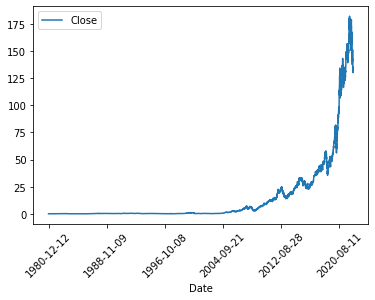

In [33]:
dataframe = dataset.dropna()
dataframe.plot(x='Date', y='Close')
plt.xticks(rotation = 45)
plt.plot()

Creating model-Random forest
because it is giving accuracy > 99.7%

In [36]:
model = RandomForestRegressor()
x = dataset.iloc[:len(dataset),[1,2,3,6]].values
y = dataset.iloc[:len(dataset),[4]].values
print(x)
print()
print(y)
print()
xtrn, xtst, ytrn, ytst = train_test_split(x,y, test_size = 0.2)
model.fit(xtrn,ytrn)
print()
print("Accuracy is ->",model.score(xtst,ytst))

[[1.28348000e-01 1.28906000e-01 1.28348000e-01 4.69033600e+08]
 [1.22210000e-01 1.22210000e-01 1.21652000e-01 1.75884800e+08]
 [1.13281000e-01 1.13281000e-01 1.12723000e-01 1.05728000e+08]
 ...
 [1.34289993e+02 1.37339996e+02 1.32160004e+02 9.15330000e+07]
 [1.32080002e+02 1.32389999e+02 1.29039993e+02 1.08123900e+08]
 [1.30070007e+02 1.33080002e+02 1.29809998e+02 1.34118500e+08]]

[[1.28348000e-01]
 [1.21652000e-01]
 [1.12723000e-01]
 ...
 [1.35429993e+02]
 [1.30059998e+02]
 [1.31559998e+02]]



<ipython-input-36-614d9754f053>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrn,ytrn)



Accuracy is -> 0.999881325203358


Predicting test set

In [40]:
pred = model.predict(xtst)
np.set_printoptions(precision=2)
table = pd.DataFrame(np.concatenate((ytst.reshape(len(pred), 1),pred.reshape(len(pred), 1)), 1), columns=['Actual','Predicted'])
print(table)

          Actual   Predicted
0       0.117188    0.117428
1       0.399286    0.399105
2      24.997499   25.021836
3       0.165179    0.168293
4      20.725714   20.559410
...          ...         ...
2089   20.273930   20.343285
2090   18.953215   18.869604
2091   26.145000   26.193875
2092   19.426071   19.430004
2093  148.789993  148.511600

[2094 rows x 2 columns]


Visualising accuracy

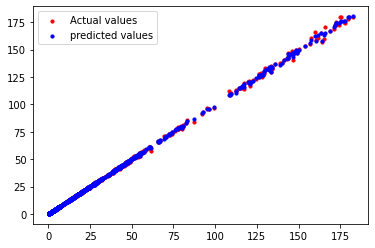

In [48]:
xax = xtst[:,0]
plt.scatter(xax, ytst, s = 10, color = 'red', label = 'Actual values')
plt.scatter(xax, pred, s = 10, color = 'blue', label = 'predicted values')
plt.legend()
plt.show()